# Taller 6 ACTD 2025-10

In [86]:
import tensorflow as tf

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Datos

In [87]:
iris = load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [88]:
print(iris.target_names)

is_virginica = np.where(iris.target == 2, 1, 0)
print(is_virginica)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [89]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, is_virginica, test_size=0.2, random_state=73)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=73)

X_train.shape

(96, 4)

In [90]:
std_scl = StandardScaler()
std_scl.fit(X_train)

print(X_train[0:3,])
X_train = std_scl.transform(X_train)
print(X_train[0:3,])
X_valid = std_scl.transform(X_valid)
X_test = std_scl.transform(X_test)

[[5.6 3.  4.5 1.5]
 [5.7 2.8 4.1 1.3]
 [6.3 2.8 5.1 1.5]]
[[-0.41435469 -0.19016171  0.33855846  0.27213501]
 [-0.28686094 -0.67057023  0.10473391  0.00690698]
 [ 0.47810156 -0.67057023  0.68929529  0.27213501]]


In [91]:
tf.random.set_seed(72)
tf.keras.backend.clear_session()

model_0 = tf.keras.Sequential()
model_0.add(tf.keras.layers.InputLayer(shape=(4,)))
model_0.add(tf.keras.layers.Dense(10, activation="relu"))
model_0.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [92]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61 (244.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

In [93]:
from tensorflow.keras.metrics import Precision

model_0.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=[Precision()])

In [94]:
history = model_0.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.7604 - precision: 0.4068 - val_loss: 0.7827 - val_precision: 0.1667
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.7498 - precision: 0.4068 - val_loss: 0.7722 - val_precision: 0.1765
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.7396 - precision: 0.4093 - val_loss: 0.7625 - val_precision: 0.1765
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.7299 - precision: 0.4093 - val_loss: 0.7533 - val_precision: 0.1765
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.7205 - precision: 0.4168 - val_loss: 0.7444 - val_precision: 0.1765
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.7112 - precision: 0.4246 - val_loss: 0.7357 - val_precision: 0.1765
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.7022 - precision: 0.4291 - val_loss: 0.7274 - val_precision: 0.1765
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.6936 - precision: 0.4374 - val_loss: 0.7197

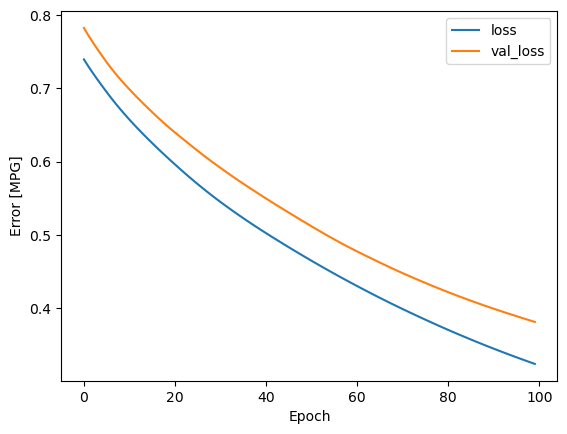

In [95]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist['model'] = 'model_0inal'

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

In [96]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [97]:
def confusion(modelo,mod, X_test, y_test):
    y_true = []
    y_pred = []

    y_pred = modelo.predict(X_test).flatten()

    # Convertir listas a arrays de NumPy
    y_true = np.array(y_test)
    y_pred = np.array(y_pred)

    # Convertir las predicciones a binario (umbral 0.5)
    y_pred_bin = (y_pred > 0.5).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_bin).ravel()

    print(f"Verdaderos Negativos (TN): {tn}")
    print(f"Falsos Positivos (FP): {fp}")
    print(f"Falsos Negativos (FN): {fn}")
    print(f"Verdaderos Positivos (TP): {tp}")

    # Cálculo de métricas

    #Accuracy

    acc_ori=(tp+tn)/(tp+tn+fp+fn)
    print("Accuracy de",str(mod)+f" {acc_ori}")

    #Precision

    pre_ori=(tp/(tp+fp)) 
    print("Precisión de",str(mod)+f" {pre_ori}")

    #Valor de predicción negativa

    vpn_ori=tn/(tn+fn)
    print(f"Valor de predicción negativa de",str(mod)+f" {vpn_ori}")

    #Tasa de verdaderos positivos

    recall_ori=tp/(tp+fn)
    print(f"Recall de",str(mod)+f" {recall_ori}")

    # Tasa de verdaderos negativos

    tnr_ori=tn/(fp+tn)
    print(f"Tasa de verdaderos negativos de",str(mod)+f" {tnr_ori}")

    #Tasa de falsos positivos - Error tipo 1

    error1_ori=fp/(fp+tn)
    print(f"Error tipo 1 de",str(mod)+f" {error1_ori}")

    #Tasa de falsos negativos - Error tipo 2

    error2_ori=fn/(fn+tp)
    print(f"Error tipo 2 de",str(mod)+f" {error2_ori}")

    #AUC
    # Calcular la curva ROC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)

    # Calcular el área bajo la curva (AUC)
    roc_auc = auc(fpr, tpr)

    print(f"Área bajo la curva (AUC): {roc_auc:.4f}")

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title('Curva ROC - '+mod)
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Verdaderos Negativos (TN): 15
Falsos Positivos (FP): 5
Falsos Negativos (FN): 0
Verdaderos Positivos (TP): 10
Accuracy de Modelo original 0.8333333333333334
Precisión de Modelo original 0.6666666666666666
Valor de predicción negativa de Modelo original 1.0
Recall de Modelo original 1.0
Tasa de verdaderos negativos de Modelo original 0.75
Error tipo 1 de Modelo original 0.25
Error tipo 2 de Modelo original 0.0
Área bajo la curva (AUC): 0.9800


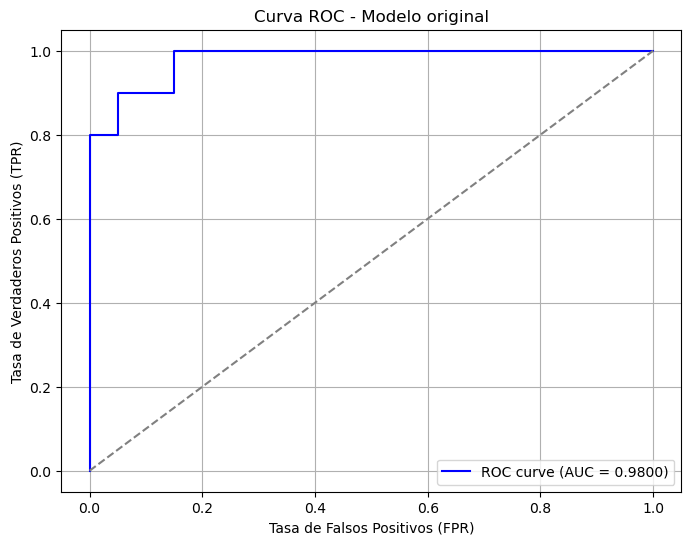

In [98]:
confusion(model_0,'Modelo original',X_test= X_test, y_test=y_test)

## Modelo 2

In [99]:
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.InputLayer(shape=(4,)))
model_1.add(tf.keras.layers.Dense(12, activation="relu"))
model_1.add(tf.keras.layers.Dense(12, activation="relu"))
model_1.add(tf.keras.layers.Dense(12, activation="relu"))
model_1.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 12)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 385 (1.50 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

In [100]:
model_1.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=[Precision()])

In [101]:
history = model_1.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.7437 - precision_1: 0.2736 - val_loss: 0.7744 - val_precision_1: 0.0714
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.7241 - precision_1: 0.3592 - val_loss: 0.7506 - val_precision_1: 0.0714
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7059 - precision_1: 0.4105 - val_loss: 0.7288 - val_precision_1: 0.1875
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.6889 - precision_1: 0.4431 - val_loss: 0.7097 - val_precision_1: 0.1875
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6733 - precision_1: 0.5266 - val_loss: 0.6917 - val_precision_1: 0.2308
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.6590 - precision_1: 0.6227 - val_loss: 0.6733 - val_precision_1: 0.2727
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6452 - precision_1: 0.6897 - val_loss: 0.6548 - val_precision_1: 0.4286
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.6316 - precision

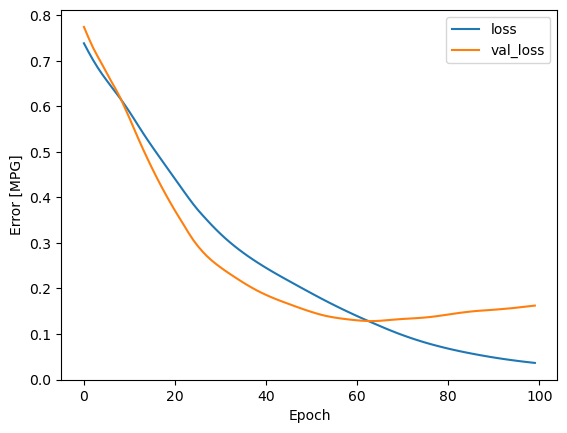

In [102]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist['model'] = 'model_0inal'

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Verdaderos Negativos (TN): 18
Falsos Positivos (FP): 2
Falsos Negativos (FN): 0
Verdaderos Positivos (TP): 10
Accuracy de Modelo original 0.9333333333333333
Precisión de Modelo original 0.8333333333333334
Valor de predicción negativa de Modelo original 1.0
Recall de Modelo original 1.0
Tasa de verdaderos negativos de Modelo original 0.9
Error tipo 1 de Modelo original 0.1
Error tipo 2 de Modelo original 0.0
Área bajo la curva (AUC): 1.0000


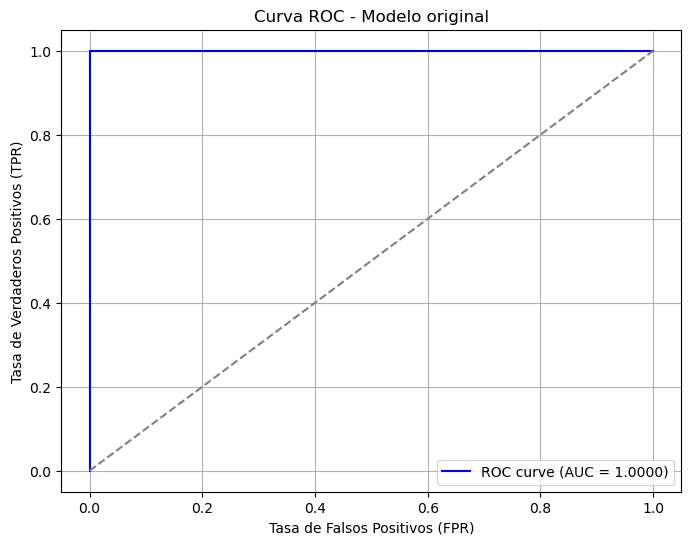

In [103]:
confusion(model_1,'Modelo original',X_test= X_test, y_test=y_test)

## Modelo 3

In [104]:
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.InputLayer(shape=(4,)))
model_2.add(tf.keras.layers.Dense(8, activation="relu"))
model_2.add(tf.keras.layers.Dense(12, activation="relu"))
model_2.add(tf.keras.layers.Dense(16, activation="relu"))
model_2.add(tf.keras.layers.Dense(20, activation="relu"))
model_2.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 20)             │           340 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 717 (2.80 KB)

 Trainable params: 717 (2.80 KB)

 Non-trainable params: 0 (0.00 B)

In [105]:
model_2.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=[Precision()])

In [106]:
history = model_2.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.6629 - precision_2: 0.0000e+00 - val_loss: 0.6165 - val_precision_2: 0.0000e+00
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.6532 - precision_2: 0.0000e+00 - val_loss: 0.6035 - val_precision_2: 0.0000e+00
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.6448 - precision_2: 0.0000e+00 - val_loss: 0.5916 - val_precision_2: 0.0000e+00
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.6368 - precision_2: 0.0000e+00 - val_loss: 0.5808 - val_precision_2: 0.0000e+00
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.6292 - precision_2: 0.0000e+00 - val_loss: 0.5705 - val_precision_2: 0.0000e+00
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.6218 - precision_2: 0.0000e+00 - val_loss: 0.5604 - val_precision_2: 0.0000e+00
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.6146 - precision_2: 0.0000e+00 - val_loss: 0.5508 - val_precision_2: 0.0000e+00
Epoch 8/100
3/3 ━━━

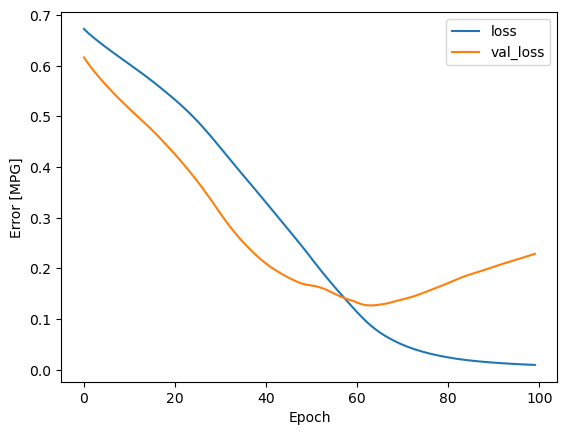

In [107]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist['model'] = 'model_0inal'

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Verdaderos Negativos (TN): 19
Falsos Positivos (FP): 1
Falsos Negativos (FN): 0
Verdaderos Positivos (TP): 10
Accuracy de Modelo original 0.9666666666666667
Precisión de Modelo original 0.9090909090909091
Valor de predicción negativa de Modelo original 1.0
Recall de Modelo original 1.0
Tasa de verdaderos negativos de Modelo original 0.95
Error tipo 1 de Modelo original 0.05
Error tipo 2 de Modelo original 0.0
Área bajo la curva (AUC): 1.0000


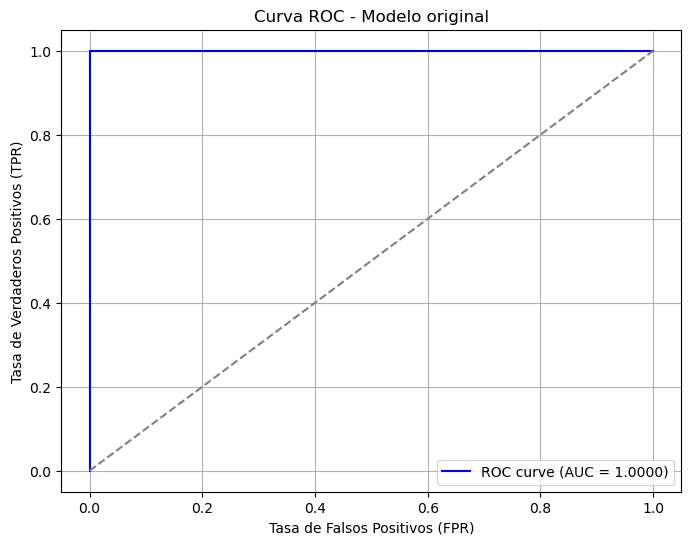

In [108]:
confusion(model_2,'Modelo original',X_test= X_test, y_test=y_test)

## Model 4

In [109]:
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.InputLayer(shape=(4,)))
model_3.add(tf.keras.layers.Dense(16, activation="relu"))
model_3.add(tf.keras.layers.Dense(12, activation="relu"))
model_3.add(tf.keras.layers.Dense(8, activation="relu"))
model_3.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 12)             │           204 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 397 (1.55 KB)

 Trainable params: 397 (1.55 KB)

 Non-trainable params: 0 (0.00 B)

In [110]:
model_3.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=[Precision()])

In [111]:
history = model_3.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.7122 - precision_3: 0.3157 - val_loss: 0.7333 - val_precision_3: 0.1053
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.7056 - precision_3: 0.3301 - val_loss: 0.7257 - val_precision_3: 0.1053
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.6999 - precision_3: 0.3301 - val_loss: 0.7187 - val_precision_3: 0.1053
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6947 - precision_3: 0.3425 - val_loss: 0.7128 - val_precision_3: 0.1053
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.6899 - precision_3: 0.3970 - val_loss: 0.7078 - val_precision_3: 0.1111
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6854 - precision_3: 0.4309 - val_loss: 0.7030 - val_precision_3: 0.1250
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.6811 - precision_3: 0.5139 - val_loss: 0.6983 - val_precision_3: 0.1429
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6768 - precision

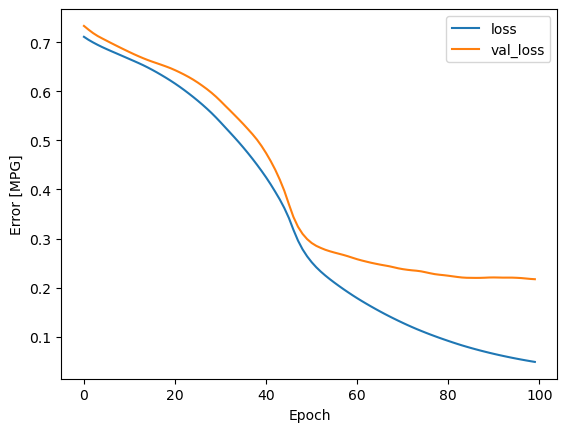

In [112]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist['model'] = 'model_0inal'

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Verdaderos Negativos (TN): 18
Falsos Positivos (FP): 2
Falsos Negativos (FN): 0
Verdaderos Positivos (TP): 10
Accuracy de Modelo original 0.9333333333333333
Precisión de Modelo original 0.8333333333333334
Valor de predicción negativa de Modelo original 1.0
Recall de Modelo original 1.0
Tasa de verdaderos negativos de Modelo original 0.9
Error tipo 1 de Modelo original 0.1
Error tipo 2 de Modelo original 0.0
Área bajo la curva (AUC): 1.0000


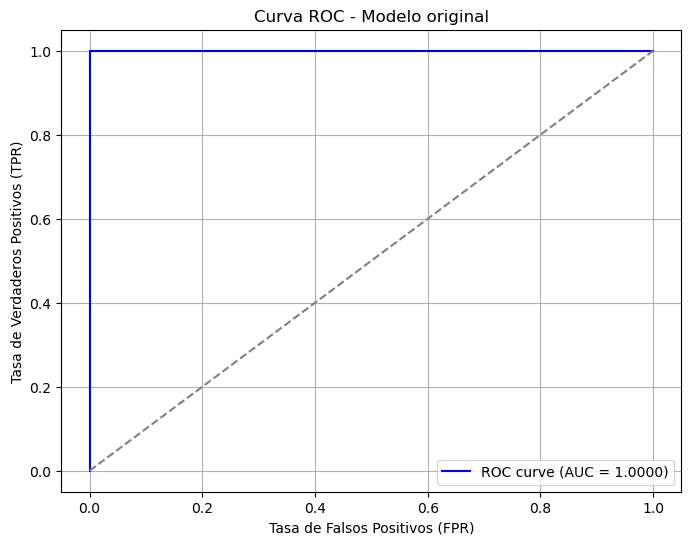

In [113]:
confusion(model_1,'Modelo original',X_test= X_test, y_test=y_test)

## Taller 6 - Punto 2

In [114]:
#Importamos librerías
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

In [115]:
# Cargamos los datos
df1 = pd.read_csv('heart.csv')

In [116]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [117]:
# Identificamos N/A
df1.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [118]:
df1["thal"].unique()

array(['fixed', 'normal', 'reversible', '1', '2'], dtype=object)

In [119]:
df1 = df1[~df1['thal'].str.isdigit()]
df1['thal'].unique()

array(['fixed', 'normal', 'reversible'], dtype=object)

In [120]:
# Ordenamos los datos

cat_int_feats = ['sex', 'cp', 'fbs', 'exang', 'ca']
cat_str_feats = ['thal']
num_feats = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
feats_ordered = cat_int_feats+cat_str_feats+num_feats

In [121]:
df1 = df1[feats_ordered+['target']]

In [122]:
# Separamos datos de train
train = df1.sample(frac=0.8, random_state=100)
train.shape

(241, 12)

In [123]:
test = df1.drop(train.index)
test.head()

,sex,cp,fbs,exang,ca,thal,age,trestbps,chol,thalach,oldpeak,target
0,1,1,1,0,0,fixed,63,145,233,150,2.3,0
2,1,4,0,1,2,reversible,67,120,229,129,2.6,0
4,0,2,0,0,0,normal,41,130,204,172,1.4,0
8,1,4,0,0,1,reversible,63,130,254,147,1.4,1
13,1,2,0,0,0,reversible,44,120,263,173,0.0,0


In [124]:
val = train.sample(frac=0.2, random_state=100)
val.shape

(48, 12)

In [125]:
train = train.drop(val.index)
print(train.shape)
print(val.shape)
print(test.shape)

(193, 12)
(48, 12)
(60, 12)


In [126]:
# convertir a datasets
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("target")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds

In [127]:
train_ds = dataframe_to_dataset(train)
val_ds = dataframe_to_dataset(val)
test_ds = dataframe_to_dataset(test)

In [128]:
for x, y in train_ds.take(1):
    print("Input:", x)
    print("Target:", y)

Input: {'sex': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'cp': <tf.Tensor: shape=(), dtype=int64, numpy=2>, 'fbs': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'exang': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'ca': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'thal': <tf.Tensor: shape=(), dtype=string, numpy=b'normal'>, 'age': <tf.Tensor: shape=(), dtype=int64, numpy=74>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=120>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=269>, 'thalach': <tf.Tensor: shape=(), dtype=int64, numpy=121>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=0.2>}
Target: tf.Tensor(0, shape=(), dtype=int64)


In [129]:
# Separamos los datos en lotes
batch_s=32
train_ds=train_ds.batch(batch_s)
val_ds=val_ds.batch(batch_s)
test_ds=test_ds.batch(batch_s)


In [130]:
train_ds

<_BatchDataset element_spec=({'sex': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'cp': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fbs': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'exang': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'ca': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'thal': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'trestbps': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'chol': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'thalach': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'oldpeak': TensorSpec(shape=(None,), dtype=tf.float64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [131]:
# se crean las funciones para codificar las variables
def encode_numerical_feature(feature, name, dataset):
    # Crea capa de normalización para este feature
    normalizer = keras.layers.Normalization()

    # Prepara el dataset para considerar únicamente la feature de interés (name)
    feature_ds = dataset.map(lambda x, y: x[name]) # selecciona variable
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1)) # deja el tensor de una dimensión

    # Aprende las estadísticas de los datos (media, varianza)
    normalizer.adapt(feature_ds)

    # Aplica la normalización a la variable
    encoded_feature = normalizer(feature)
    return encoded_feature

def encode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = keras.layers.StringLookup if is_string else keras.layers.IntegerLookup
    # Crea una capa Lookup para retornas variables 0/1 (dummies)
    # lookup: busca el valor correspondiente de la variable categórica
    lookup = lookup_class(output_mode="binary")

    # Prepara el dataset para considerar únicamente la feature de interés (name)
    feature_ds = dataset.map(lambda x, y: x[name]) # selecciona variable
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1)) # deja el tensor de una dimensión

    # Aprende el conjunto de posibles valores que toma la variable categórica y asigna enteros
    lookup.adapt(feature_ds)

    # Aplica la conversión de categorías a enteros
    encoded_feature = lookup(feature)
    return encoded_feature

In [132]:
#Crear las listas de imputs
inputs = []
for i in cat_int_feats:
  inputs.append(keras.Input(shape=(1,), name=i, dtype="int64"))
for i in cat_str_feats:
  inputs.append(keras.Input(shape=(1,), name=i, dtype="string"))
for i in num_feats:
  inputs.append(keras.Input(shape=(1,), name=i))

for i in inputs:
   print(i)

<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=sex>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=cp>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=fbs>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=exang>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=ca>
<KerasTensor shape=(None, 1), dtype=string, sparse=False, name=thal>
<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=age>
<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=trestbps>
<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=chol>
<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=thalach>
<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=oldpeak>


In [133]:
feats_encoded = []
for i,feat in enumerate(cat_int_feats):
  feats_encoded.append(
      encode_categorical_feature(inputs[i], feat, train_ds, False)
  )

len_feats = len(feats_encoded)

for i,feat in enumerate(cat_str_feats):
  feats_encoded.append(
      encode_categorical_feature(inputs[len_feats+i], feat, train_ds, True)
  )

len_feats = len(feats_encoded)

for i,feat in enumerate(num_feats):
  feats_encoded.append(
      encode_numerical_feature(inputs[len_feats+i], feat, train_ds)
  )

for i in feats_encoded:
  print(i)

<KerasTensor shape=(None, 3), dtype=float32, sparse=False, name=keras_tensor_42>
<KerasTensor shape=(None, 6), dtype=float32, sparse=False, name=keras_tensor_43>
<KerasTensor shape=(None, 3), dtype=float32, sparse=False, name=keras_tensor_44>
<KerasTensor shape=(None, 3), dtype=float32, sparse=False, name=keras_tensor_45>
<KerasTensor shape=(None, 5), dtype=float32, sparse=False, name=keras_tensor_46>
<KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_47>
<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_48>
<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_49>
<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_50>
<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_51>
<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_52>


In [134]:
all_feats = keras.layers.concatenate(feats_encoded)

In [135]:
#agregamos una capa oculta de 32 neuronas y una capa de 1 que será salida

model_layers = keras.layers.Dense(32, activation='relu')(all_feats)


In [136]:
model_layers = keras.layers.Dense(1, activation='sigmoid')(model_layers)

In [137]:

modelo_original = keras.Model(inputs, model_layers)

In [138]:
#se usa el optimizador adams
modelo_original.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [139]:
keras.utils.plot_model(modelo_original, show_shapes=True, rankdir="LR")

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [140]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

In [141]:
#entrenamos el modelo con train

history=modelo_original.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4318 - loss: 0.7605 - val_accuracy: 0.5625 - val_loss: 0.6803
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5942 - loss: 0.6820 - val_accuracy: 0.6667 - val_loss: 0.6282
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6390 - loss: 0.6582 - val_accuracy: 0.6667 - val_loss: 0.5897
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6693 - loss: 0.5849 - val_accuracy: 0.6875 - val_loss: 0.5603
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7489 - loss: 0.5373 - val_accuracy: 0.7292 - val_loss: 0.5356
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7561 - loss: 0.5020 - val_accuracy: 0.7292 - val_loss: 0.5172
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7780 - loss: 0.4866 - val_accuracy: 0.7292 - val_loss: 0.5053
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7688 - loss: 0.4806 - val_accuracy: 0.7292 - val_loss: 0.4956
Epoch 9

In [142]:
import matplotlib.pyplot as plt

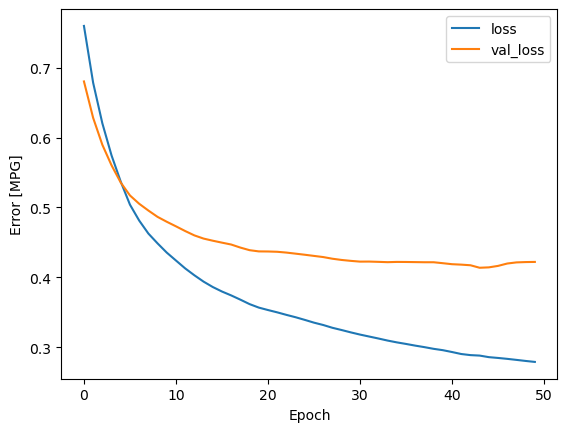

In [143]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist['model'] = 'Model_original'

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

In [144]:
test_loss, test_acc = modelo_original.evaluate(test_ds)
print(f"Precisión en el conjunto de prueba: {test_acc:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7931 - loss: 0.3864 


Precisión en el conjunto de prueba: 0.7833


In [145]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc


In [146]:
def confusion(modelo,mod):
    y_true = []
    y_pred = []

    for x, y in test_ds:
        y_true.extend(y.numpy())  # Guardar etiquetas reales
        y_pred.extend(modelo.predict(x).flatten())  # Obtener predicciones y aplanar

    # Convertir listas a arrays de NumPy
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Convertir las predicciones a binario (umbral 0.5)
    y_pred_bin = (y_pred > 0.5).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_bin).ravel()

    print(f"Verdaderos Negativos (TN): {tn}")
    print(f"Falsos Positivos (FP): {fp}")
    print(f"Falsos Negativos (FN): {fn}")
    print(f"Verdaderos Positivos (TP): {tp}")

    # Cálculo de métricas

    #Accuracy

    acc_ori=(tp+tn)/(tp+tn+fp+fn)
    print("Accuracy de",str(mod)+f" {acc_ori}")

    #Precision

    pre_ori=(tp/(tp+fp)) 
    print("Precisión de",str(mod)+f" {pre_ori}")

    #Valor de predicción negativa

    vpn_ori=tn/(tn+fn)
    print(f"Valor de predicción negativa de",str(mod)+f" {vpn_ori}")

    #Tasa de verdaderos positivos

    recall_ori=tp/(tp+fn)
    print(f"Recall de",str(mod)+f" {recall_ori}")

    # Tasa de verdaderos negativos

    tnr_ori=tn/(fp+tn)
    print(f"Tasa de verdaderos negativos de",str(mod)+f" {tnr_ori}")

    #Tasa de falsos positivos - Error tipo 1

    error1_ori=fp/(fp+tn)
    print(f"Error tipo 1 de",str(mod)+f" {error1_ori}")

    #Tasa de falsos negativos - Error tipo 2

    error2_ori=fn/(fn+tp)
    print(f"Error tipo 2 de",str(mod)+f" {error2_ori}")

    #AUC
    # Calcular la curva ROC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)

    # Calcular el área bajo la curva (AUC)
    roc_auc = auc(fpr, tpr)

    print(f"Área bajo la curva (AUC): {roc_auc:.4f}")

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title('Curva ROC - '+mod)
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Verdaderos Negativos (TN): 33
Falsos Positivos (FP): 3
Falsos Negativos (FN): 10
Verdaderos Positivos (TP): 14
Accuracy de Modelo original 0.7833333333333333
Precisión de Modelo original 0.8235294117647058
Valor de predicción negativa de Modelo original 0.7674418604651163
Recall de Modelo original 0.5833333333333334
Tasa de verdaderos negativos de Modelo original 0.9166666666666666
Error tipo 1 de Modelo original 0.08333333333333333
Error tipo 2 de Modelo original 0.4166666666666667
Área bajo la curva (AUC): 0.9329


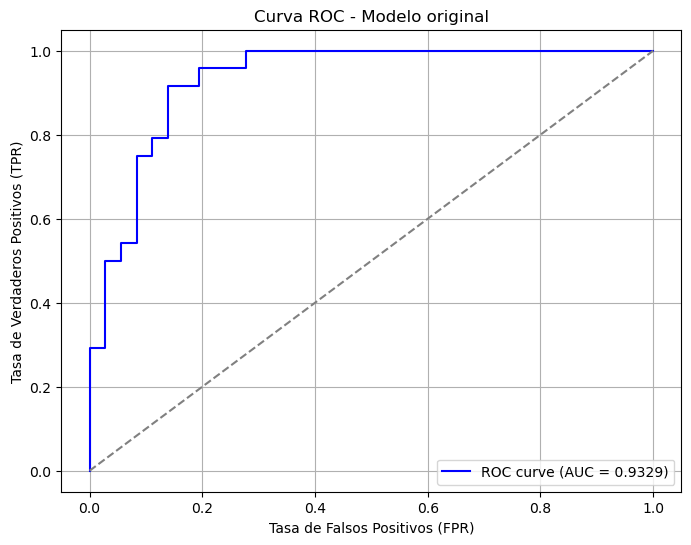

In [147]:
confusion(modelo_original,"Modelo original")


## Cambios de optimizador

Se usó el optimizador SGD y Lion para los siguientes modelos.

In [148]:
model_layers = keras.layers.Dense(32, activation='relu')(all_feats)
model_layers = keras.layers.Dense(1, activation='sigmoid')(model_layers)

modelo = keras.Model(inputs, model_layers)

modelo.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
modelo.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7712 - loss: 0.5361 - val_accuracy: 0.7292 - val_loss: 0.5651
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7725 - loss: 0.5339 - val_accuracy: 0.7708 - val_loss: 0.5560
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8041 - loss: 0.5058 - val_accuracy: 0.7292 - val_loss: 0.5485
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7684 - loss: 0.5186 - val_accuracy: 0.7500 - val_loss: 0.5383
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7973 - loss: 0.4888 - val_accuracy: 0.7500 - val_loss: 0.5303
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7602 - loss: 0.5062 - val_accuracy: 0.7500 - val_loss: 0.5222
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7916 - loss: 0.4746 - val_accuracy: 0.7292 - val_loss: 0.5159
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7723 - loss: 0.4692 - val_accuracy: 0.7083 - val_loss: 0.5094
Epoch 9

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Verdaderos Negativos (TN): 34
Falsos Positivos (FP): 2
Falsos Negativos (FN): 11
Verdaderos Positivos (TP): 13
Accuracy de Modelo con op=SGD 0.7833333333333333
Precisión de Modelo con op=SGD 0.8666666666666667
Valor de predicción negativa de Modelo con op=SGD 0.7555555555555555
Recall de Modelo con op=SGD 0.5416666666666666
Tasa de verdaderos negativos de Modelo con op=SGD 0.9444444444444444
Error tipo 1 de Modelo con op=SGD 0.05555555555555555
Error tipo 2 de Modelo con op=SGD 0.4583333333333333
Área bajo la curva (AUC): 0.9282


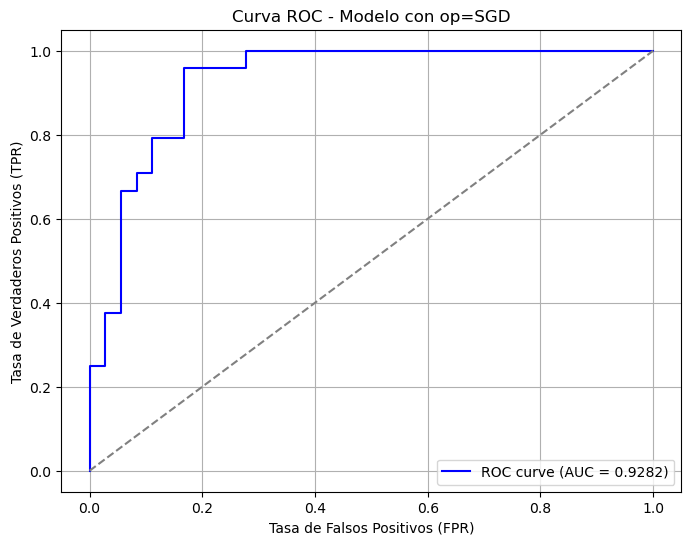

In [149]:
confusion(modelo,"Modelo con op=SGD")

In [150]:
modelo_lion = keras.Model(inputs, model_layers)

modelo_lion.compile(optimizer='lion', loss='binary_crossentropy', metrics=['accuracy'])
modelo_lion.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8442 - loss: 0.3080 - val_accuracy: 0.7708 - val_loss: 0.4342
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8337 - loss: 0.3210 - val_accuracy: 0.7708 - val_loss: 0.4317
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8564 - loss: 0.2792 - val_accuracy: 0.7917 - val_loss: 0.4250
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8711 - loss: 0.2997 - val_accuracy: 0.7917 - val_loss: 0.4208
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8657 - loss: 0.2756 - val_accuracy: 0.7917 - val_loss: 0.4192
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8722 - loss: 0.3045 - val_accuracy: 0.7917 - val_loss: 0.4221
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8912 - loss: 0.2565 - val_accuracy: 0.7917 - val_loss: 0.4306
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9070 - loss: 0.2414 - val_accuracy: 0.7917 - val_loss: 0.4447
Epoch 9

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Verdaderos Negativos (TN): 32
Falsos Positivos (FP): 4
Falsos Negativos (FN): 7
Verdaderos Positivos (TP): 17
Accuracy de Modelo con Op=Lion 0.8166666666666667
Precisión de Modelo con Op=Lion 0.8095238095238095
Valor de predicción negativa de Modelo con Op=Lion 0.8205128205128205
Recall de Modelo con Op=Lion 0.7083333333333334
Tasa de verdaderos negativos de Modelo con Op=Lion 0.8888888888888888
Error tipo 1 de Modelo con Op=Lion 0.1111111111111111
Error tipo 2 de Modelo con Op=Lion 0.2916666666666667
Área bajo la curva (AUC): 0.9352


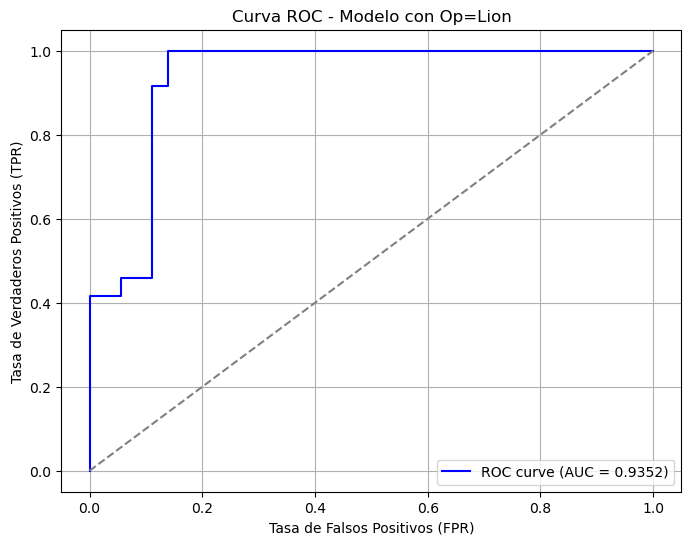

In [151]:
confusion(modelo_lion,'Modelo con Op=Lion')

## Cambios de tasa de aprendizaje

Se modificaron las tasas de aprendizaje en los siguientes modelos usando nuevamente el optimizador Adam

In [152]:
from keras.optimizers import Adam

Primero con una tasa=0.01

In [153]:
modelo41 = keras.Model(inputs, model_layers)

modelo41.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
modelo41.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.9147 - loss: 0.1870 - val_accuracy: 0.8125 - val_loss: 0.5572
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9442 - loss: 0.1280 - val_accuracy: 0.7917 - val_loss: 0.5752
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9389 - loss: 0.1346 - val_accuracy: 0.7917 - val_loss: 0.6069
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9327 - loss: 0.1385 - val_accuracy: 0.7917 - val_loss: 0.6282
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9511 - loss: 0.1132 - val_accuracy: 0.7917 - val_loss: 0.6475
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9534 - loss: 0.1093 - val_accuracy: 0.7917 - val_loss: 0.6538
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9550 - loss: 0.1160 - val_accuracy: 0.8125 - val_loss: 0.6478
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9320 - loss: 0.1549 - val_accuracy: 0.7917 - val_loss: 0.6454
Epoch 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Verdaderos Negativos (TN): 32
Falsos Positivos (FP): 4
Falsos Negativos (FN): 9
Verdaderos Positivos (TP): 15
Accuracy de Modelo con tasa de aprendizaje=0.01 0.7833333333333333
Precisión de Modelo con tasa de aprendizaje=0.01 0.7894736842105263
Valor de predicción negativa de Modelo con tasa de aprendizaje=0.01 0.7804878048780488
Recall de Modelo con tasa de aprendizaje=0.01 0.625
Tasa de verdaderos negativos de Modelo con tasa de aprendizaje=0.01 0.8888888888888888
Error tipo 1 de Modelo con tasa de aprendizaje=0.01 0.1111111111111111
Error tipo 2 de Modelo con tasa de aprendizaje=0.01 0.375
Área bajo la curva (AUC): 0.9120


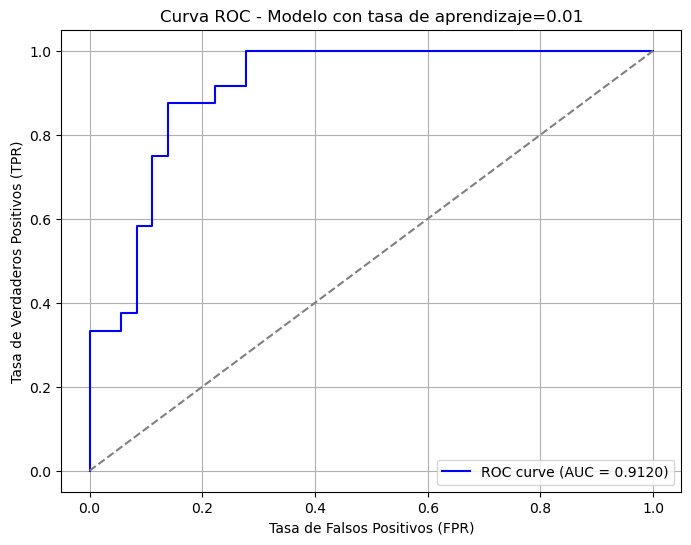

In [154]:
confusion(modelo41,"Modelo con tasa de aprendizaje=0.01")

Ahora con una tasa=0.0001

In [155]:
modelo42 = keras.Model(inputs, model_layers)

modelo42.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
modelo42.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 1.0000 - loss: 0.0302 - val_accuracy: 0.8333 - val_loss: 0.9751
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0256 - val_accuracy: 0.8333 - val_loss: 0.9759
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0236 - val_accuracy: 0.8333 - val_loss: 0.9771
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0185 - val_accuracy: 0.8333 - val_loss: 0.9782
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0285 - val_accuracy: 0.8333 - val_loss: 0.9790
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0303 - val_accuracy: 0.8333 - val_loss: 0.9798
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0215 - val_accuracy: 0.8333 - val_loss: 0.9807
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0210 - val_accuracy: 0.8333 - val_loss: 0.9816
Epoch 9/50
7/7 ━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Verdaderos Negativos (TN): 32
Falsos Positivos (FP): 4
Falsos Negativos (FN): 9
Verdaderos Positivos (TP): 15
Accuracy de Mod con tasa=0.0001 0.7833333333333333
Precisión de Mod con tasa=0.0001 0.7894736842105263
Valor de predicción negativa de Mod con tasa=0.0001 0.7804878048780488
Recall de Mod con tasa=0.0001 0.625
Tasa de verdaderos negativos de Mod con tasa=0.0001 0.8888888888888888
Error tipo 1 de Mod con tasa=0.0001 0.1111111111111111
Error tipo 2 de Mod con tasa=0.0001 0.375
Área bajo la curva (AUC): 0.9120


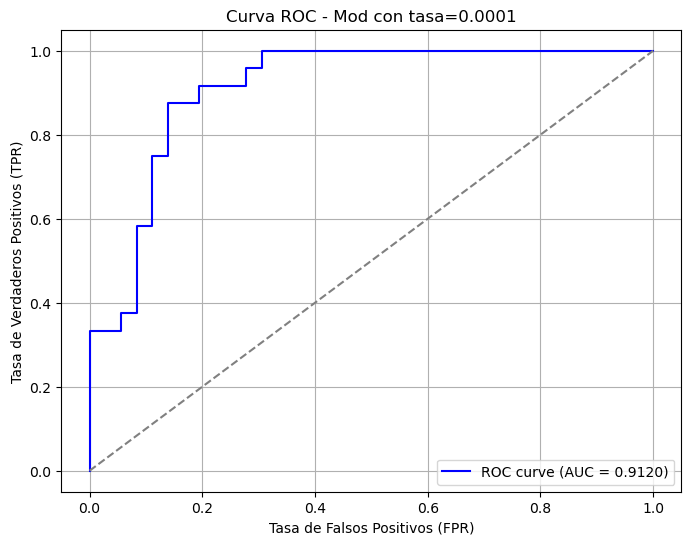

In [156]:
confusion(modelo42,"Mod con tasa=0.0001")

Ahora con una tasa de aprendizaje=0.1

In [157]:
modelo43 = keras.Model(inputs, model_layers)

modelo43.compile(optimizer=Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])
modelo43.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9299 - loss: 0.2884 - val_accuracy: 0.8125 - val_loss: 1.5038
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8512 - loss: 0.4605 - val_accuracy: 0.7708 - val_loss: 1.0129
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9074 - loss: 0.2012 - val_accuracy: 0.8542 - val_loss: 1.1071
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9424 - loss: 0.1462 - val_accuracy: 0.7708 - val_loss: 1.3094
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9262 - loss: 0.1223 - val_accuracy: 0.8125 - val_loss: 1.3207
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9393 - loss: 0.1537 - val_accuracy: 0.8125 - val_loss: 1.7315
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9260 - loss: 0.2676 - val_accuracy: 0.8125 - val_loss: 1.3588
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9667 - loss: 0.1279 - val_accuracy: 0.7708 - val_loss: 1.4903
Epoch 9

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Verdaderos Negativos (TN): 33
Falsos Positivos (FP): 3
Falsos Negativos (FN): 9
Verdaderos Positivos (TP): 15
Accuracy de Modelo con tasa=0.1 0.8
Precisión de Modelo con tasa=0.1 0.8333333333333334
Valor de predicción negativa de Modelo con tasa=0.1 0.7857142857142857
Recall de Modelo con tasa=0.1 0.625
Tasa de verdaderos negativos de Modelo con tasa=0.1 0.9166666666666666
Error tipo 1 de Modelo con tasa=0.1 0.08333333333333333
Error tipo 2 de Modelo con tasa=0.1 0.375
Área bajo la curva (AUC): 0.9201


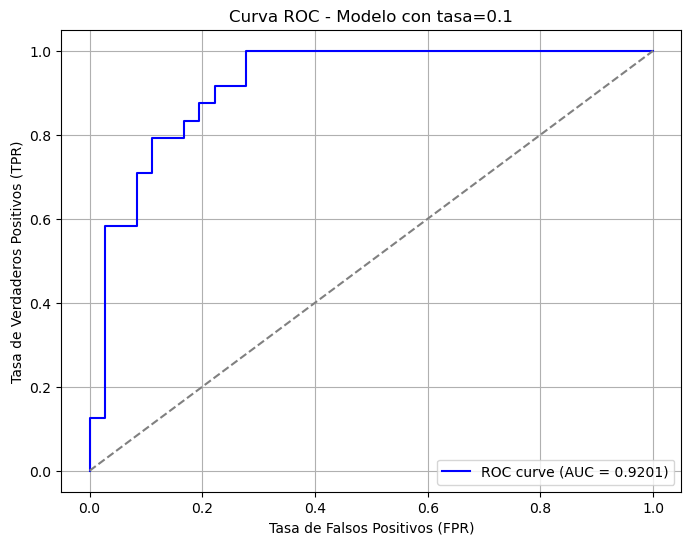

In [158]:
confusion(modelo43,"Modelo con tasa=0.1")

## Cambios en la función de activación

Se cambiara la función de activación, modificando la original que usó relu

In [159]:
model_layers41 = keras.layers.Dense(32, activation='tanh')(all_feats)
model_layers41 = keras.layers.Dense(1, activation='sigmoid')(model_layers)

modelo_41 = keras.Model(inputs, model_layers41)

modelo_41.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

modelo_41.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7592 - loss: 0.7072 - val_accuracy: 0.7500 - val_loss: 0.6998
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7766 - loss: 0.7037 - val_accuracy: 0.7500 - val_loss: 0.6977
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7576 - loss: 0.7023 - val_accuracy: 0.7500 - val_loss: 0.6956
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7641 - loss: 0.6995 - val_accuracy: 0.7500 - val_loss: 0.6935
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7579 - loss: 0.6976 - val_accuracy: 0.7500 - val_loss: 0.6915
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7731 - loss: 0.6940 - val_accuracy: 0.7500 - val_loss: 0.6895
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7796 - loss: 0.6909 - val_accuracy: 0.7500 - val_loss: 0.6875
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7842 - loss: 0.6882 - val_accuracy: 0.7500 - val_loss: 0.6859
Epoch 9

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Verdaderos Negativos (TN): 33
Falsos Positivos (FP): 3
Falsos Negativos (FN): 9
Verdaderos Positivos (TP): 15
Accuracy de Modelo con activación tanh 0.8
Precisión de Modelo con activación tanh 0.8333333333333334
Valor de predicción negativa de Modelo con activación tanh 0.7857142857142857
Recall de Modelo con activación tanh 0.625
Tasa de verdaderos negativos de Modelo con activación tanh 0.9166666666666666
Error tipo 1 de Modelo con activación tanh 0.08333333333333333
Error tipo 2 de Modelo con activación tanh 0.375
Área bajo la curva (AUC): 0.9155


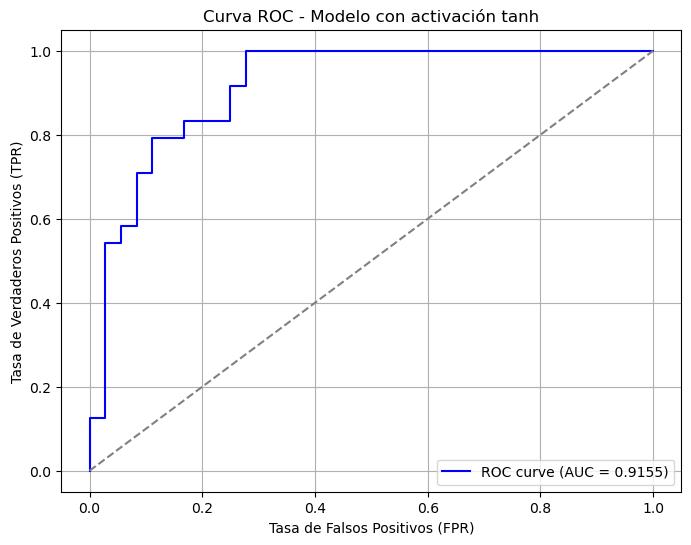

In [160]:
confusion(modelo41,"Modelo con activación tanh")

In [161]:
model_layers42 = keras.layers.Dense(32, activation='mish')(all_feats)
model_layers42 = keras.layers.Dense(1, activation='sigmoid')(model_layers)

modelo_42 = keras.Model(inputs, model_layers42)

modelo_42.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

modelo_42.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8976 - loss: 0.5892 - val_accuracy: 0.8333 - val_loss: 0.6547
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9453 - loss: 0.6128 - val_accuracy: 0.8542 - val_loss: 0.6521
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9432 - loss: 0.5926 - val_accuracy: 0.8333 - val_loss: 0.6498
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9578 - loss: 0.5885 - val_accuracy: 0.8333 - val_loss: 0.6477
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9708 - loss: 0.5882 - val_accuracy: 0.8542 - val_loss: 0.6455
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9722 - loss: 0.5851 - val_accuracy: 0.8750 - val_loss: 0.6434
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9789 - loss: 0.5761 - val_accuracy: 0.8750 - val_loss: 0.6415
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9709 - loss: 0.5820 - val_accuracy: 0.8750 - val_loss: 0.6395
Epoch 9

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Verdaderos Negativos (TN): 33
Falsos Positivos (FP): 3
Falsos Negativos (FN): 9
Verdaderos Positivos (TP): 15
Accuracy de Modelo con activación mish 0.8
Precisión de Modelo con activación mish 0.8333333333333334
Valor de predicción negativa de Modelo con activación mish 0.7857142857142857
Recall de Modelo con activación mish 0.625
Tasa de verdaderos negativos de Modelo con activación mish 0.9166666666666666
Error tipo 1 de Modelo con activación mish 0.08333333333333333
Error tipo 2 de Modelo con activación mish 0.375
Área bajo la curva (AUC): 0.8831


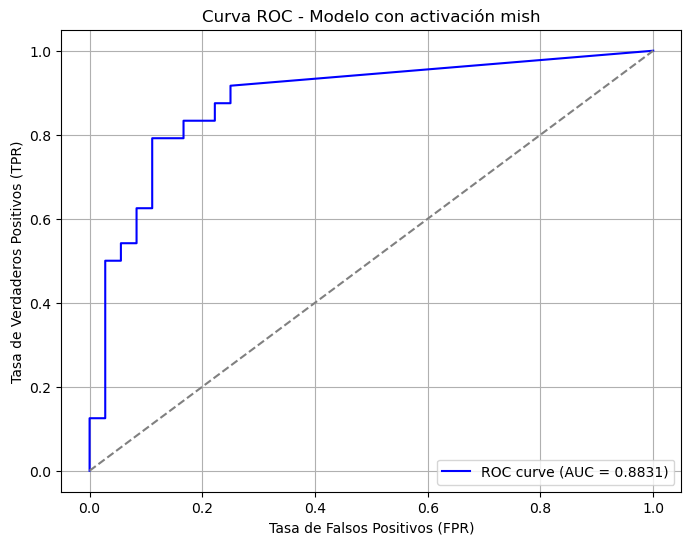

In [162]:
confusion(modelo_42,"Modelo con activación mish")

In [163]:
model_layers43 = keras.layers.Dense(32, activation='gelu')(all_feats)
model_layers43 = keras.layers.Dense(1, activation='sigmoid')(model_layers)

modelo_43 = keras.Model(inputs, model_layers43)

modelo_43.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

modelo_43.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8933 - loss: 0.5888 - val_accuracy: 0.8542 - val_loss: 0.6534
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9422 - loss: 0.5773 - val_accuracy: 0.8542 - val_loss: 0.6512
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9661 - loss: 0.5789 - val_accuracy: 0.8542 - val_loss: 0.6492
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9485 - loss: 0.5767 - val_accuracy: 0.8750 - val_loss: 0.6473
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9667 - loss: 0.5773 - val_accuracy: 0.8750 - val_loss: 0.6453
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9748 - loss: 0.5698 - val_accuracy: 0.8750 - val_loss: 0.6434
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9655 - loss: 0.5698 - val_accuracy: 0.8750 - val_loss: 0.6416
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9766 - loss: 0.5473 - val_accuracy: 0.8750 - val_loss: 0.6395
Epoch 9

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
Verdaderos Negativos (TN): 33
Falsos Positivos (FP): 3
Falsos Negativos (FN): 9
Verdaderos Positivos (TP): 15
Accuracy de Modelo con activación gelu 0.8
Precisión de Modelo con activación gelu 0.8333333333333334
Valor de predicción negativa de Modelo con activación gelu 0.7857142857142857
Recall de Modelo con activación gelu 0.625
Tasa de verdaderos negativos de Modelo con activación gelu 0.9166666666666666
Error tipo 1 de Modelo con activación gelu 0.08333333333333333
Error tipo 2 de Modelo con activación gelu 0.375
Área bajo la curva (AUC): 0.8843


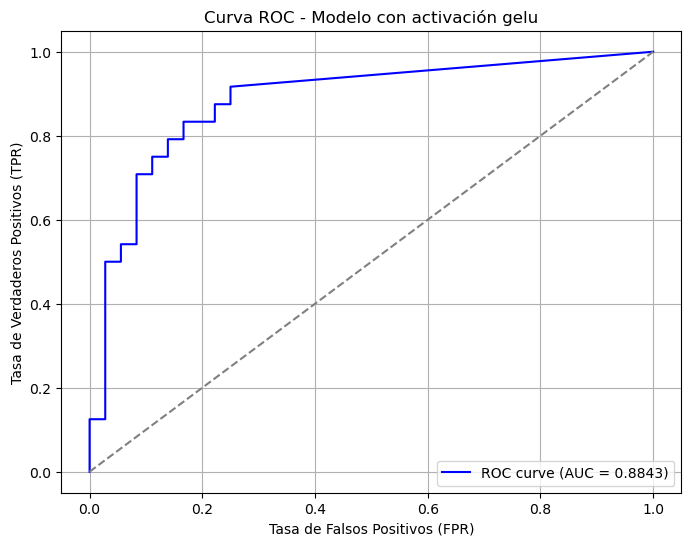

In [164]:
confusion(modelo_43,"Modelo con activación gelu")

## Modelos Propuestos

In [165]:
from keras.optimizers import SGD, Lion



In [166]:
model_layers51 = keras.layers.Dense(32, activation='relu')(all_feats)
model_layers51 = keras.layers.Dense(1, activation='sigmoid')(model_layers)

modelo_51 = keras.Model(inputs, model_layers51)

modelo_51.compile(optimizer=SGD(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

modelo_51.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7659 - loss: 0.9136 - val_accuracy: 0.7500 - val_loss: 0.8206
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7674 - loss: 0.8659 - val_accuracy: 0.7500 - val_loss: 0.7865
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7270 - loss: 0.8718 - val_accuracy: 0.7500 - val_loss: 0.7568
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7465 - loss: 0.8133 - val_accuracy: 0.7500 - val_loss: 0.7305
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7622 - loss: 0.7621 - val_accuracy: 0.7500 - val_loss: 0.7041
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7629 - loss: 0.7271 - val_accuracy: 0.7500 - val_loss: 0.6803
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7375 - loss: 0.7241 - val_accuracy: 0.7500 - val_loss: 0.6587
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7721 - loss: 0.6606 - val_accuracy: 0.7500 - val_loss: 0.6389
Epoch 9

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Verdaderos Negativos (TN): 33
Falsos Positivos (FP): 3
Falsos Negativos (FN): 9
Verdaderos Positivos (TP): 15
Accuracy de Modelo SGD-0.1-Relu 0.8
Precisión de Modelo SGD-0.1-Relu 0.8333333333333334
Valor de predicción negativa de Modelo SGD-0.1-Relu 0.7857142857142857
Recall de Modelo SGD-0.1-Relu 0.625
Tasa de verdaderos negativos de Modelo SGD-0.1-Relu 0.9166666666666666
Error tipo 1 de Modelo SGD-0.1-Relu 0.08333333333333333
Error tipo 2 de Modelo SGD-0.1-Relu 0.375
Área bajo la curva (AUC): 0.8843


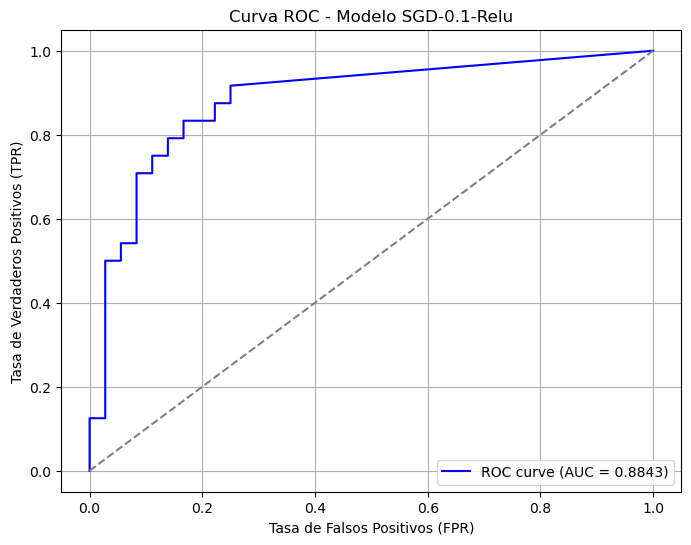

In [167]:
confusion(modelo_51,"Modelo SGD-0.1-Relu")

In [168]:
model_layers52 = keras.layers.Dense(32, activation='tanh')(all_feats)
model_layers52 = keras.layers.Dense(1, activation='sigmoid')(model_layers)

modelo_52 = keras.Model(inputs, model_layers52)

modelo_52.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

modelo_52.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7208 - loss: 0.9767 - val_accuracy: 0.7500 - val_loss: 0.8661
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7182 - loss: 0.9763 - val_accuracy: 0.7500 - val_loss: 0.8659
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7712 - loss: 0.9238 - val_accuracy: 0.7500 - val_loss: 0.8657
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7667 - loss: 0.9278 - val_accuracy: 0.7500 - val_loss: 0.8655
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7648 - loss: 0.9291 - val_accuracy: 0.7500 - val_loss: 0.8654
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7661 - loss: 0.9276 - val_accuracy: 0.7500 - val_loss: 0.8652
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7543 - loss: 0.9394 - val_accuracy: 0.7500 - val_loss: 0.8650
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8090 - loss: 0.8836 - val_accuracy: 0.7500 - val_loss: 0.8649
Epoch 9

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Verdaderos Negativos (TN): 36
Falsos Positivos (FP): 0
Falsos Negativos (FN): 24
Verdaderos Positivos (TP): 0
Accuracy de Adam-0.0001-tanH 0.6
Precisión de Adam-0.0001-tanH nan
Valor de predicción negativa de Adam-0.0001-tanH 0.6
Recall de Adam-0.0001-tanH 0.0
Tasa de verdaderos negativos de Adam-0.0001-tanH 1.0
Error tipo 1 de Adam-0.0001-tanH 0.0
Error tipo 2 de Adam-0.0001-tanH 1.0
Área bajo la curva (AUC): 0.1325


C:\Users\nicolas.arrieta\AppData\Local\Temp\ipykernel_3468\3386765025.py:31: RuntimeWarning: invalid value encountered in scalar divide
  pre_ori=(tp/(tp+fp))


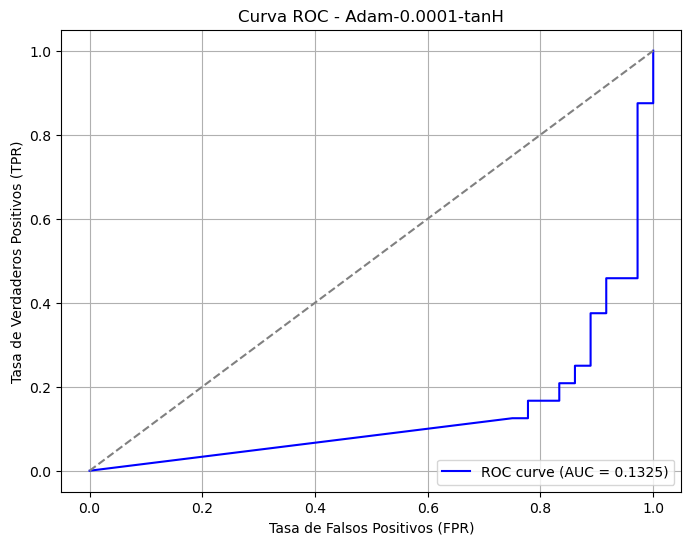

In [169]:
confusion(modelo_52,"Adam-0.0001-tanH")